In [29]:
using DrWatson
@quickactivate "Doran_etal_2022"

In [30]:
using NewickTreeTools
include(joinpath(srcdir(), "helpers.jl"))

asdistancematrix

# 8x14 tree

In [12]:
origtree = readnw(read("$(datadir())/exp_raw/toyMSAs/8x14sourcetree.nw", String))
as_polytomy!(origtree)
origtree

(((Tip01:0.07,Tip02:0.07):0.07,(Tip03:0.07,Tip04:0.07):0.07):0.07,((Tip05:0.07,Tip06:0.07):0.07,(Tip07:0.07,Tip08:0.07):0.07):0.07);

In [11]:
predtree = readnw(read("$(projectdir())/_research/testSPI/8x14MSA/8x14MSA-supporttree.nw", String))
as_polytomy!(predtree, fun=n->NewickTree.support(n)<.5)
predtree

(((Tip01:2.828427,Tip02:2.828427)0.6799999999999999:1.035276,(Tip04:2.828427,Tip03:2.828427)0.6:1.035276)0.7966666666666666:0.6460838,((Tip07:2.828427,Tip08:2.828427)0.65:1.035276,(Tip05:2.828427,Tip06:2.828427)0.63:1.035276)0.7966666666666666:0.6460838);

In [13]:
fscore_precision_recall(origtree, predtree)

(1.0, 1.0, 1.0)

# 18x9 tree

In [14]:
origtree = readnw(read("$(datadir())/exp_raw/toyMSAs/18x9sourcetree.nw", String))
as_polytomy!(origtree)
origtree

(((Tip01:0.11,Tip02:0.11,Tip03:0.11):0.11,(Tip04:0.11,Tip05:0.11,Tip06:0.11):0.11,(Tip07:0.11,Tip08:0.11,Tip09:0.11):0.11):0.3,((Tip10:0.11,Tip11:0.11,Tip12:0.11):0.11,(Tip13:0.11,Tip14:0.11,Tip15:0.11):0.11,(Tip16:0.11,Tip17:0.11,Tip18:0.11):0.11):0.3);

In [25]:
predtree = readnw(read("$(projectdir())/_research/testSPI/18x9MSA/18x9MSA-supporttree.nw", String))
as_polytomy!(predtree, fun=n->NewickTree.support(n)<.52)
predtree

(((Tip06:1.155231,Tip04:1.155084,Tip05:1.155084)0.655:3.079051,(Tip07:1.155043,Tip08:1.154827,Tip09:1.154827)0.63:3.079079,(Tip03:1.155004,Tip02:1.154848,Tip01:1.154848)0.6699999999999999:3.079118)0.77625:3.880664,((Tip11:1.155024,Tip10:1.154963,Tip12:1.154963)0.685:3.079114,(Tip15:1.155017,Tip14:1.154921,Tip13:1.154921)0.6599999999999999:3.079074,(Tip16:1.154996,Tip18:1.154888,Tip17:1.154888)0.6950000000000001:3.079096)0.77625:3.880809);

In [24]:
fscore_precision_recall(origtree, predtree)

(1.0, 1.0, 1.0)

# Balenced tree t16

In [26]:
origtree = readnw(read("$(datadir())/sims/trees/balancedtree-t16-s123456.nw", String))
as_polytomy!(origtree)
origtree

(((Tip0:0.2196255156418136,Tip1:0.1099934846003698):0.014197679938066293,(Tip2:0.01401237089883913,Tip3:0.26939394790416077):0.019849262568183368):0.06629624983917037,((Tip4:0.22433565139808453,Tip5:0.3203798212418786):0.015579035901552445,(Tip6:0.0006904978363117634,Tip7:0.09148287183858836):0.031312926985296426):0.25904385564582155,(((Tip8:0.24461941918925553,Tip9:0.20529165162932497):0.1689035473249933,(Tip10:0.06194818193976446,Tip11:0.03233559552669011):0.26041549288417914):0.0010195753847223607,((Tip12:0.26504410442522974,Tip13:0.09094291534828734):0.09164943511635301,(Tip14:0.05579276740178023,Tip15:0.16974274250006757):0.17115708163774782):0.009012521978299336):0.14213665185524693);

In [83]:
predtree = readnw(read("$(projectdir())/_research/runSPI/balancedtree-t16-s123456-l10000-b20/balancedtree-t16-s123456-l10000-b20-supporttree.nw", String))
# as_polytomy!(predtree, fun=n->NewickTree.support(n)<.5)
predtree

(((Tip6:147.6071,Tip7:147.6071)1.0:165.7528,((Tip4:192.339,Tip5:192.339)0.8:23.24542,(((Tip8:172.4124,Tip9:172.4124)1.0:25.27202,(Tip12:187.5861,(Tip13:177.9848,(Tip14:155.4885,Tip15:155.4885)1.0:22.49632)0.79:9.601285)0.6866666666666668:10.09833)0.568:6.473283,(Tip3:191.8409,(Tip0:183.4034,(Tip1:152.8497,Tip2:152.8497)1.0:30.55372)0.7:8.437454)0.6833333333333333:12.31684)0.648:11.42673)0.7266666666666667:97.77549)1.0:4.867912,(Tip10:112.0836,Tip11:112.0836)1.0:206.1443);

In [84]:
map(prewalk(predtree)) do n
    NewickTree.setsupport!(n.data, NewickTree.support(n) * 100)
end;

In [85]:
fscore_precision_recall(origtree, predtree)

(0.5714285714285714, 0.5714285714285714, 0.5714285714285714)

In [86]:
NewickTree.nwstr(predtree)

"(((Tip6:147.6071,Tip7:147.6071)100.0:165.7528,((Tip4:192.339,Tip5:192.339)80.0:23.24542,(((Tip8:172.4124,Tip9:172.4124)100.0:25.27202,(Tip12:187.5861,(Tip13:177.9848,(Tip14:155.4885,Tip15:155.4885)100.0:22.49632)79.0:9.601285)68.66666666666667:10.09833)56.8:6.473283,(Tip3:191.8409,(Tip0:183.4034,(Tip1:152.8497,Tip2:152.8497)100.0:30.55372)70.0:8.437454)68.33333333333333:12.31684)64.8:11.42673)72.66666666666667:97.77549)100.0:4.867912,(Tip10:112.0836,Tip11:112.0836)100.0:206.1443);"

In [46]:
patristic_distances(origtree)

120-element Vector{Float64}:
 0.3296190002421834
 0.7656393474829631
 0.7360267610698887
 0.8079621587941793
 0.6338609697172368
 0.6782184682921245
 0.7921684433904119
 0.2676848290469024
 0.523066406052224
 0.7990779883645087
 ⋮
 0.4587546559673158
 1.1516819065434707
 1.11235413898354
 0.09217336967490013
 0.8477264742216479
 0.8083987066617173
 0.9385188482239245
 0.8991910806639939
 0.4499110708185805

In [55]:
using StatsPlots

In [76]:
lorder = [1,2,9,10,11,12,13,14,15,16,3,4,5,6,7,8]

16-element Vector{Int64}:
  1
  2
  9
 10
 11
 12
 13
 14
 15
 16
  3
  4
  5
  6
  7
  8

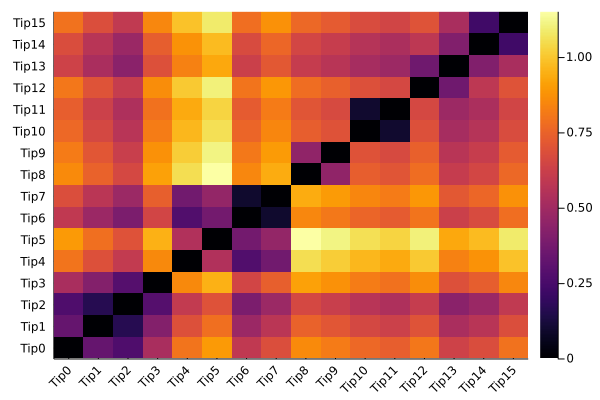

In [78]:
leafnames = sort(getleafnames(origtree))
nleaves = length(leafnames)
heatmap(asdistancematrix(patristic_distances(origtree))[lorder,lorder],
    ticks=(1:nleaves, leafnames[lorder]), xrotation=45)

In [69]:
patristic_distance(origleaves[1], origleaves[2])

0.3296190002421834

In [70]:
patristic_distance(origleaves[2], origleaves[3])

0.1580527980054586

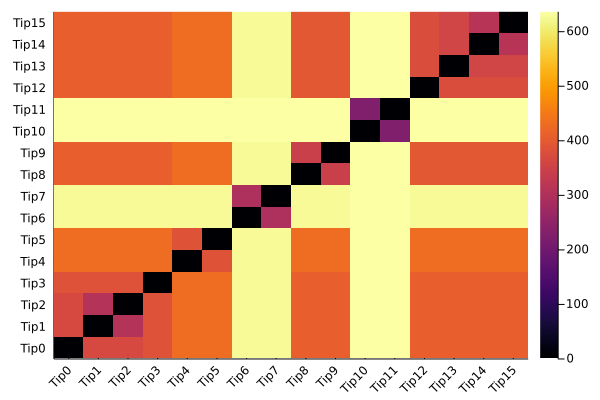

In [79]:
leafnames = sort(getleafnames(predtree))
nleaves = length(leafnames)
heatmap(asdistancematrix(patristic_distances(predtree))[lorder,lorder],
    ticks=(1:nleaves, leafnames[lorder]), xrotation=45)

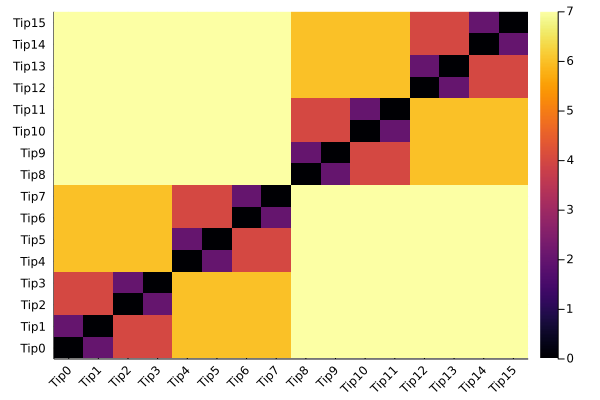

In [81]:
leafnames = sort(getleafnames(origtree))
nleaves = length(leafnames)
heatmap(asdistancematrix(network_distances(origtree))[lorder,lorder],
    ticks=(1:nleaves, leafnames[lorder]), xrotation=45)

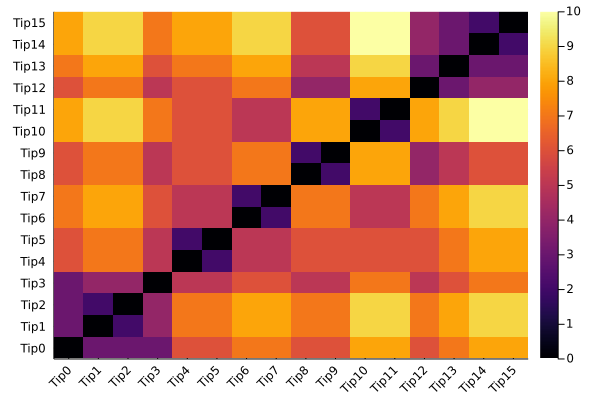

In [82]:
leafnames = sort(getleafnames(predtree))
nleaves = length(leafnames)
heatmap(asdistancematrix(network_distances(predtree))[lorder,lorder],
    ticks=(1:nleaves, leafnames[lorder]), xrotation=45)

# G-Halomonas-E

In [3]:
origtree = readnw(read("$(datadir())/sims/trees/gtdb-g__Halomonas_E-t16.nw", String))
as_polytomy!(origtree)
origtree

((((((Tip01:0.0062,Tip02:0.00926):0.00459,Tip03:0.00673):0.00811,(Tip04:0.00666,Tip05:0.00514):0.0172):0.04979,Tip06:0.08305):0.01817,((((Tip07:0.00507,Tip08:0.00808):0.01018,Tip09:0.01683):0.00584,Tip10:0.01513):0.03834,Tip11:0.05886):0.01297):0.00576,(((Tip12:0.02328,Tip13:0.02508):0.01529,Tip14:0.05556):0.01772,(Tip15:0.03749,Tip16:0.04629):0.06576):0.00628);

In [4]:
predtree = readnw(read(
    "$(projectdir())/_research/runSPI/gtdb-g__Halomonas_E-t16-l1000-b20/gtdb-g__Halomonas_E-t16-l1000-b20-supporttree.nw", String))
as_polytomy!(predtree, fun=n->NewickTree.support(n)<.5)
predtree

((((Tip02:45.29606,Tip01:45.29606)0.81:6.189838,Tip03:51.4859)1.0:61.64304,(Tip05:39.04155,Tip04:39.04155)1.0:74.08738)1.0:71.14197,((((Tip06:65.54712,(Tip15:61.68853,Tip16:61.68853)0.86:3.85859)0.8049999999999999:2.428159,(Tip14:64.51952,((Tip12:58.45096,Tip13:58.45096)0.95:4.76699,Tip11:63.21795)0.7:1.301566)0.8933333333333333:3.45576)1.0:35.64376,(Tip10:59.24463,Tip09:59.24463)0.99:44.3744)0.88:50.21871,(Tip08:44.60583,Tip07:44.60583)1.0:109.2319)1.0:30.43316);

In [31]:
spitree = readnw(read(
    "$(projectdir())/_research/runSPI/gtdb-g__Halomonas_E-t16-l1000-b20/gtdb-g__Halomonas_E-t16-l1000-b20-tree.nw", String))
# as_polytomy!(spitree, fun=n->NewickTree.support(n)<.5)
spitree

((((Tip02:45.29606,Tip01:45.29606):6.189838,Tip03:51.4859):61.64304,(Tip05:39.04155,Tip04:39.04155):74.08738):71.14197,((((Tip06:65.54712,(Tip15:61.68853,Tip16:61.68853):3.85859):2.428159,(Tip14:64.51952,((Tip12:58.45096,Tip13:58.45096):4.76699,Tip11:63.21795):1.301566):3.45576):35.64376,(Tip10:59.24463,Tip09:59.24463):44.3744):50.21871,(Tip08:44.60583,Tip07:44.60583):109.2319):30.43316);

In [5]:
map(prewalk(predtree)) do n
    NewickTree.setsupport!(n.data, NewickTree.support(n) * 100)
end;

In [6]:
fscore_precision_recall(origtree, predtree)

(0.5714285714285714, 0.5714285714285714, 0.5714285714285714)

In [7]:
NewickTree.nwstr(predtree)

"((((Tip02:45.29606,Tip01:45.29606)81.0:6.189838,Tip03:51.4859)100.0:61.64304,(Tip05:39.04155,Tip04:39.04155)100.0:74.08738)100.0:71.14197,((((Tip06:65.54712,(Tip15:61.68853,Tip16:61.68853)86.0:3.85859)80.5:2.428159,(Tip14:64.51952,((Tip12:58.45096,Tip13:58.45096)95.0:4.76699,Tip11:63.21795)70.0:1.301566)89.33333333333333:3.45576)100.0:35.64376,(Tip10:59.24463,Tip09:59.24463)99.0:44.3744)88.0:50.21871,(Tip08:44.60583,Tip07:44.60583)100.0:109.2319)100.0:30.43316);"

In [8]:
using StatsPlots

In [9]:
lorder = [1,2,9,10,11,12,13,14,15,16,3,4,5,6,7,8];
lorder = collect(1:16);

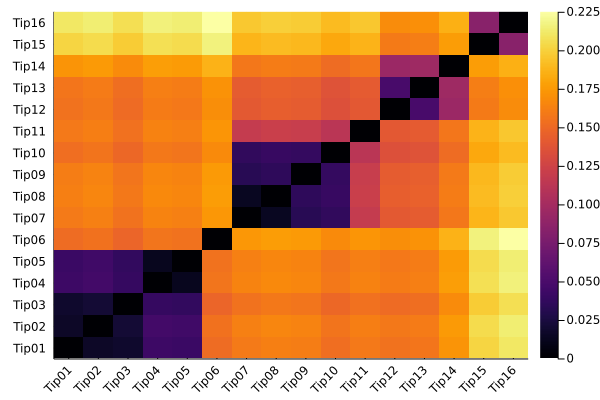

In [10]:
leafnames = sort(getleafnames(origtree))
nleaves = length(leafnames)
heatmap(asdistancematrix(patristic_distances(origtree))[lorder,lorder],
    ticks=(1:nleaves, leafnames[lorder]), xrotation=45)

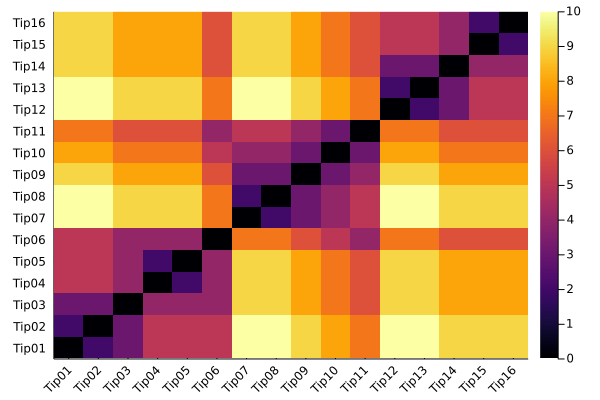

In [11]:
leafnames = sort(getleafnames(origtree))
nleaves = length(leafnames)
heatmap(asdistancematrix(network_distances(origtree))[lorder,lorder],
    ticks=(1:nleaves, leafnames[lorder]), xrotation=45)

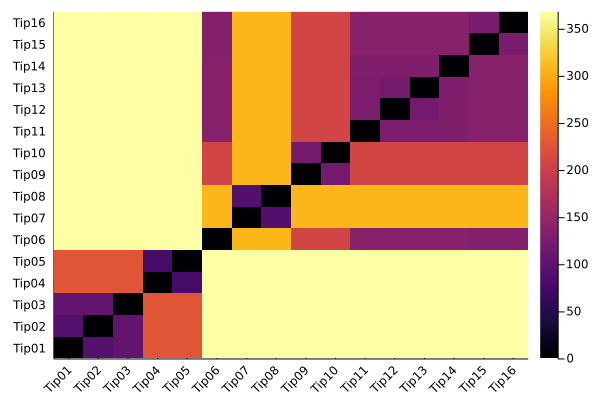

In [12]:
leafnames = sort(getleafnames(predtree))
nleaves = length(leafnames)
heatmap(asdistancematrix(patristic_distances(predtree))[lorder,lorder],
    ticks=(1:nleaves, leafnames[lorder]), xrotation=45)

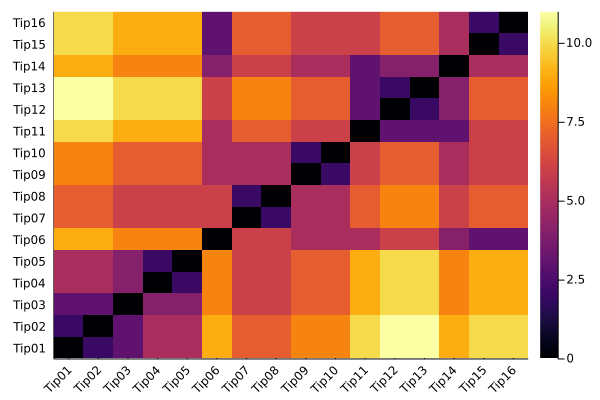

In [13]:
leafnames = sort(getleafnames(predtree))
nleaves = length(leafnames)
heatmap(asdistancematrix(network_distances(predtree))[lorder,lorder],
    ticks=(1:nleaves, leafnames[lorder]), xrotation=45)

In [13]:
using Random
using Clustering, Distances
m = randexp(10, 10)

10×10 Matrix{Float64}:
 0.668705   0.257262  0.320804    0.164334   …  0.753651  1.64555    1.0328
 0.688417   0.966104  0.906143    0.507552      2.45258   0.310972   1.22275
 0.762678   1.19136   0.804698    0.0909924     0.472236  0.392537   0.783586
 2.02071    0.334361  1.31823     1.11725       1.92878   1.71736    0.536088
 0.0223082  1.38374   0.52069     0.129384      2.5082    2.97364    0.397516
 0.310903   0.473901  0.776489    1.28638    …  0.22629   0.0312708  0.63734
 0.705342   1.51643   1.96412     1.1035        0.622326  0.615667   0.837866
 0.374977   4.20652   2.0895      0.732675      0.745552  1.75647    0.28336
 1.79583    0.552938  0.00541652  1.29998       0.603362  0.0732061  0.254104
 0.212638   1.21274   2.62845     0.648601      0.872697  2.09839    0.208347

In [25]:
hc = hclust(pairwise(Euclidean(), m), linkage=:average)

Hclust{Float64}([-5 -10; -1 -4; … ; 6 7; -7 8], [1.5911777558988431, 1.799981524948855, 1.8967639099012081, 2.6136393067954042, 2.914290875040504, 2.9912854112930187, 3.446523812589011, 3.800061670085668, 5.632677723628766], [7, 2, 3, 5, 10, 6, 1, 4, 8, 9], :average)

In [17]:
using SPI

In [26]:
SPI.nwstr(hc, labelinternalnodes=false)

"(7:5.632678e+00,((2:2.991285e+00,3:2.991285e+00):8.087763e-01,(((5:1.591178e+00,10:1.591178e+00):1.022462e+00,(6:1.896764e+00,(1:1.799982e+00,4:1.799982e+00):9.678238e-02):7.168754e-01):8.328845e-01,(8:2.914291e+00,9:2.914291e+00):5.322329e-01):3.535379e-01):1.832616e+00):0.000000e+00;"

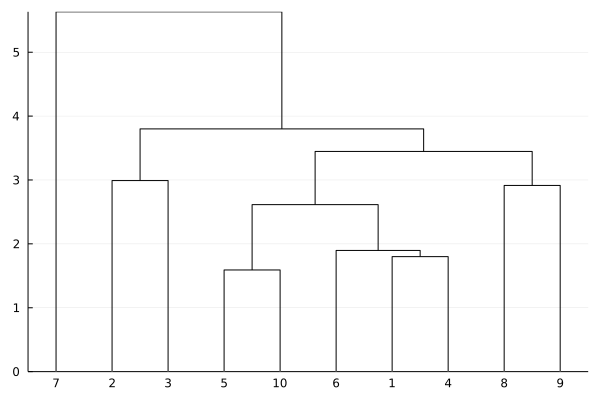

In [27]:
plot(hc)